In [1]:
#Final Project - Dated 22 Nov 2019

In [94]:
conda install -c conda-forge folium

Solving environment: done

## Package Plan ##

  environment location: /Users/vidhyasagarudayakumar/anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    folium-0.10.1              |             py_0          59 KB  conda-forge
    openssl-1.1.1d             |       h0b31af3_0         1.9 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.3 MB

The following NEW packages w

In [95]:
#required libraries
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats import linregress
from scipy.stats.mstats import zscore
import statsmodels.formula.api as smf
import numpy
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier 
import folium

In [106]:
#import datasets
columns = ['Date','Primary Type','Location Description','Arrest','District','Community Area','Year', 'X Coordinate', 'Y Coordinate']
two1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', usecols= columns)
two5 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', usecols= columns)
two8 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', usecols= columns)
two12 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', usecols= columns)
community_to_major_section = pd.read_csv('community_to_major_section.csv')

/Users/vidhyasagarudayakumar/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning:

Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.

/Users/vidhyasagarudayakumar/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning:

Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.



In [107]:
#Creating seasons variable

#splitting - 1
datetimestamp = two1['Date'].str.split(n=1, expand=True)
datetimestamp.columns = ['date_id{}'.format(x+1) for x in datetimestamp.columns]
two1 = two1.join(datetimestamp)

#splitting - 2
datetimestamp = two5['Date'].str.split(n=1, expand=True)
datetimestamp.columns = ['date_id{}'.format(x+1) for x in datetimestamp.columns]
two5 = two5.join(datetimestamp)

#splitting - 3
datetimestamp = two8['Date'].str.split(n=1, expand=True)
datetimestamp.columns = ['date_id{}'.format(x+1) for x in datetimestamp.columns]
two8 = two8.join(datetimestamp)

#splitting - 4
datetimestamp = two12['Date'].str.split(n=1, expand=True)
datetimestamp.columns = ['date_id{}'.format(x+1) for x in datetimestamp.columns]
two12 = two12.join(datetimestamp)

#seasons



In [108]:
two1[['day','month','year']] = two1.date_id1.str.split('/', expand=True)
two5[['day','month','year']] = two5.date_id1.str.split('/', expand=True)
two8[['day','month','year']] = two8.date_id1.str.split('/', expand=True)
two12[['day','month','year']] = two12.date_id1.str.split('/', expand=True)

In [109]:
def replace_check(row):
    if row == '06' or row == '07' or row == '08':
        val = 'Summer'
    elif row == '03' or row == '04' or row == '05':
        val = 'Spring'
    elif row == '12' or row == '01' or row == '02':
        val = 'Winter'
    else:
        val = 'Fall'
    return val

In [110]:
#Seasons Initialize

two1['Seasons'] = two1.month.apply(replace_check)
two5['Seasons'] = two5.month.apply(replace_check)
two8['Seasons'] = two8.month.apply(replace_check)
two12['Seasons'] = two12.month.apply(replace_check)

#Seasons Done

In [111]:
#Time Splitting - 1 
two1[['hour','minute','second']] = two1.date_id2.str.split(':', expand=True)

#Time Splitting - 2 
two5[['hour','minute','second']] = two5.date_id2.str.split(':', expand=True)

#Time Splitting - 3
two8[['hour','minute','second']] = two8.date_id2.str.split(':', expand=True)

#Time Splitting - 4
two12[['hour','minute','second']] = two12.date_id2.str.split(':', expand=True)

In [112]:
#TimeSplit2 - 1
two1[['second', 'dayperiod']] = two1.second.str.split(' ', expand=True)

#TimeSplit2 - 2
two5[['second', 'dayperiod']] = two5.second.str.split(' ', expand=True)

#TimeSplit2 - 3
two8[['second', 'dayperiod']] = two8.second.str.split(' ', expand=True)

#TimeSplit2 - 4
two12[['second', 'dayperiod']] = two12.second.str.split(' ', expand=True)

In [113]:
def period_replace_check(dayperiod,hour,minute):
    try:
        if dayperiod == "AM":
            if int(hour) in [5,6,7,8,9,10,11] and int(minute) in range(0,60):
                val = 'Morning'
            elif int(hour) in [12,1,2,3,4] and int(minute) in range(0,60):
                val = 'Night'
        else:
            if int(hour) in [5,6,7,8] and int(minute) in range(0,60):
                val = 'Evening'
            elif int(hour) in [12,1,2,3,4] and int(minute) in range(0,60):
                val = 'Noon' 
            elif int(hour) in [9,10,11] and int(minute) in range(0,60):
                val = 'Night'
    except:
        val = ''
    return val

In [114]:
#TimePeriod - Initialize

In [115]:
two1['TimePeriod'] = two1.apply(lambda x: period_replace_check(x.dayperiod, x.hour, x.minute), axis=1)

In [116]:
two5['TimePeriod'] = two5.apply(lambda x: period_replace_check(x.dayperiod, x.hour, x.minute), axis=1)

In [117]:
two8['TimePeriod'] = two8.apply(lambda x: period_replace_check(x.dayperiod, x.hour, x.minute), axis=1)

In [118]:
two12['TimePeriod'] = two12.apply(lambda x: period_replace_check(x.dayperiod, x.hour, x.minute), axis=1)

In [119]:
#TimePeriod - End

In [120]:
# Major section - Begin

In [121]:
# create dictionary of community areas to major section of chicago using community_to_major_section csv file
major_section_dic = community_to_major_section.set_index('Community Area')['Major Section'].to_dict()

In [122]:
two1['Major Section'] = two1['Community Area'].replace(major_section_dic)

In [123]:
two5['Major Section'] = two5['Community Area'].replace(major_section_dic)

In [124]:
two8['Major Section'] = two8['Community Area'].replace(major_section_dic)

In [125]:
two12['Major Section'] = two12['Community Area'].replace(major_section_dic)

In [126]:
# Major section - End

In [127]:
major_section_dic

{8.0: 'Central',
 32.0: 'Central',
 33.0: 'Central',
 5.0: 'North side',
 6.0: 'North side',
 7.0: 'North side',
 21.0: 'North side',
 22.0: 'North side',
 1.0: 'Far North side',
 2.0: 'Far North side',
 3.0: 'Far North side',
 4.0: 'Far North side',
 9.0: 'Far North side',
 10.0: 'Far North side',
 11.0: 'Far North side',
 12.0: 'Far North side',
 13.0: 'Far North side',
 14.0: 'Far North side',
 76.0: 'Far North side',
 77.0: 'Far North side',
 15.0: 'Northwest side',
 16.0: 'Northwest side',
 17.0: 'Northwest side',
 18.0: 'Northwest side',
 19.0: 'Northwest side',
 20.0: 'Northwest side',
 23.0: 'West side',
 24.0: 'West side',
 25.0: 'West side',
 26.0: 'West side',
 27.0: 'West side',
 28.0: 'West side',
 29.0: 'West side',
 30.0: 'West side',
 31.0: 'West side',
 34.0: 'South side',
 35.0: 'South side',
 36.0: 'South side',
 37.0: 'South side',
 38.0: 'South side',
 39.0: 'South side',
 40.0: 'South side',
 41.0: 'South side',
 42.0: 'South side',
 43.0: 'South side',
 60.0: 'So

In [128]:
#merge datasets
finaldatasets = pd.concat([two1, two5, two8, two12]) 
finaldatasets.isnull().sum()

Date                         0
Primary Type                 0
Location Description      1990
Arrest                       0
District                    91
Community Area          702092
X Coordinate            105573
Y Coordinate            105574
Year                         1
date_id1                     0
date_id2                     1
day                          0
month                        1
year                         1
Seasons                      0
hour                         1
minute                       1
second                       1
dayperiod                    1
TimePeriod                   0
Major Section           702092
dtype: int64

In [129]:
finaldatasets.head()

,Date,Primary Type,Location Description,Arrest,District,Community Area,X Coordinate,Y Coordinate,Year,date_id1,...,day,month,year,Seasons,hour,minute,second,dayperiod,TimePeriod,Major Section
0,01/01/2004 12:01:00 AM,THEFT,RESIDENCE,False,4.0,46.0,NaN,NaN,2004.0,01/01/2004,...,01,01,2004,Winter,12,01,00,AM,Night,Far Southeast side
1,03/01/2003 12:00:00 AM,OTHER OFFENSE,RESIDENCE,False,9.0,61.0,1.17397e+06,1.87676e+06,2003.0,03/01/2003,...,03,01,2003,Winter,12,00,00,AM,Night,Southwest side
2,06/20/2004 11:00:00 AM,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,14.0,22.0,NaN,NaN,2004.0,06/20/2004,...,06,20,2004,Fall,11,00,00,AM,Morning,North side
3,12/30/2004 08:00:00 PM,THEFT,OTHER,False,25.0,20.0,NaN,NaN,2004.0,12/30/2004,...,12,30,2004,Fall,08,00,00,PM,Evening,Northwest side
4,05/01/2003 01:00:00 AM,THEFT,RESIDENCE,False,22.0,49.0,1.17495e+06,1.83105e+06,2003.0,05/01/2003,...,05,01,2003,Winter,01,00,00,AM,Night,Far Southeast side


In [130]:
# finaldatasets.to_excel(index = False)
#export_csv = finaldatasets.to_csv (r'\Users\mustafahabeeb\Desktop\export_dataframe.csv', index = None, header=True)

In [131]:
finaldatasets['Community Area'].unique()

array([46., 61., 22., 20., 49., 29., 50., 73.,  8., 77., 65., 43., 59.,
       66., 23., 62., 67., 32., 70., 10., 25., 19., 44., 45., 28., 68.,
       30., 40., 11.,  3., 71., 42., 17., 34., 63., 37., 69., 55., 35.,
       27., 48., 24., 72., 18., 15., 12.,  6.,  7., 52., 60., 26., 58.,
       74., 64.,  5.,  2., 53., 56., 21., 31., 51.,  4., 33., 39., 38.,
       16., 41.,  1., 75., 14., 57., 36., 13., 76., 47.,  9., nan, 54.,
        0.])

In [132]:
len(finaldatasets['Primary Type'].unique())

36

In [133]:
finaldatasets['Primary Type'].unique()

array(['THEFT', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'NARCOTICS', 'GAMBLING', 'PROSTITUTION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL DAMAGE', 'ASSAULT', 'STALKING', 'ARSON',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'ROBBERY', 'OBSCENITY',
       'KIDNAPPING', 'INTIMIDATION', 'RITUALISM', 'DOMESTIC VIOLENCE',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'False', 'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [134]:
finaldatasets['Primary Type'] = finaldatasets['Primary Type'].str.lower()


In [135]:
primary_type_dict = {
  "theft": "THEFT",
  "other offense": "OFFENSE",
  "offense involving children": "OFFENSE",
  "crim sexual assault": "ASSAULT",
  "motor vehicle theft": "THEFT",
  "sex offense": "OFFENSE",
  "deceptive practice": "OTHER",
  "battery": "ASSAULT",
  "burglary": "THEFT",
  "weapons violation": "VIOLATION",
  "public peace violation": "VIOLATION",
  "gambling": "WHITE COLLAR CRIME",
  "prostitution": "WHITE COLLAR CRIME",
  "liquor law violation": "VIOLATION",
  "interference with public officer": "VIOLATION",
  "criminal damage": "DAMAGES",
  "assault": "ASSAULT",
  "stalking": "VIOLATION",
  "arson": "DAMAGES",
  "criminal trespass": "VIOLATION",
  "homicide": "MURDER",
  "obscenity": "OTHER",
  "kidnapping": "KIDNAPPING",
  "intimidation": "ASSAULT",
  "ritualism": "OTHER",
  "domestic violence": "ASSAULT",
  "other narcotic violation": "WHITE COLLAR CRIME",
  "public indecency": "VIOLATION",
  "non-criminal": "OTHER",
  "false": "OTHER",
  "human trafficking": "KIDNAPPING",
  "concealed carry license violation": "OTHER",
  "non - criminal": "OTHER",
  "non-criminal (subject specified)": "OTHER",
  "robbery":"THEFT",
  "narcotics":"WHITE COLLAR CRIME"  
}

In [136]:
finaldatasets['Primary Crime Type'] = finaldatasets['Primary Type'].replace(primary_type_dict)

In [137]:
finaldatasets['Location Description'].unique()

array(['RESIDENCE', 'OTHER', 'APARTMENT', 'RESIDENCE PORCH/HALLWAY',
       'GAS STATION', 'COMMERCIAL / BUSINESS OFFICE', 'STREET', 'BANK',
       'SMALL RETAIL STORE', 'DEPARTMENT STORE', 'SIDEWALK',
       'APPLIANCE STORE', 'HOTEL/MOTEL', 'MEDICAL/DENTAL OFFICE',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY',
       'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'DAY CARE CENTER',
       'RESTAURANT', 'COLLEGE/UNIVERSITY GROUNDS',
       'SCHOOL, PUBLIC, BUILDING', 'HOSPITAL BUILDING/GROUNDS',
       'WAREHOUSE', 'FACTORY/MANUFACTURING BUILDING',
       'SCHOOL, PRIVATE, GROUNDS', 'GROCERY FOOD STORE', 'CHA APARTMENT',
       'SCHOOL, PUBLIC, GROUNDS', 'VEHICLE NON-COMMERCIAL',
       'GOVERNMENT BUILDING/PROPERTY', 'AIRPORT/AIRCRAFT',
       'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
       'POLICE FACILITY/VEH PARKING LOT', 'TAVERN/LIQUOR STORE',
       'CHA HALLWAY/STAIRWELL/ELEVATOR', 'RESIDENCE-GARAGE',
       'PARK PROPERTY', 'CHA PARKING LOT/GROUNDS', 'ABANDONED BUILDING'

In [138]:
finaldatasets['Location Description'] = finaldatasets['Location Description'].str.lower()

In [139]:
location_dict = {'residence': 'RESIDENTIAL',
 'other': 'OTHER',
 'apartment': 'RESIDENTIAL',
 'residence porch/hallway': 'RESIDENTIAL',
 'gas station': 'COMMERCIAL',
 'commercial / business office': 'COMMERCIAL',
 'street': 'PUBLIC',
 'bank': 'PUBLIC',
 'small retail store': 'COMMERCIAL',
 'department store': 'COMMERCIAL',
 'sidewalk': 'PUBLIC',
 'appliance store': 'COMMERCIAL',
 'hotel/motel': 'PUBLIC',
 'medical/dental office': 'HEALTHCARE FACILITY',
 'parking lot/garage(non.resid.)': 'PUBLIC',
 'alley': 'PUBLIC',
 'church/synagogue/place of worship': 'PLACE OF WORSHIP',
 'day care center': 'EDUCATION',
 'restaurant': 'COMMERCIAL',
 'college/university grounds': 'EDUCATION',
 'school, public, building': 'EDUCATION',
 'hospital building/grounds': 'HEALTHCARE FACILITY',
 'warehouse': 'PRIVATE',
 'factory/manufacturing building': 'PRIVATE',
 'school, private, grounds': 'EDUCATION',
 'grocery food store': 'COMMERCIAL',
 'cha apartment': 'RESIDENTIAL',
 'school, public, grounds': 'EDUCATION',
 'vehicle non-commercial': 'PRIVATE',
 'government building/property': 'GOVERNMENT',
 'airport/aircraft': 'PRIVATE',
 'atm (automatic teller machine)': 'PUBLIC',
 'vacant lot/land': 'PRIVATE',
 'police facility/veh parking lot': 'GOVERNMENT',
 'tavern/liquor store': 'COMMERCIAL',
 'cha hallway/stairwell/elevator': 'RESIDENTIAL',
 'residence-garage': 'RESIDENTIAL',
 'park property': 'GOVERNMENT',
 'cha parking lot/grounds': 'RESIDENTIAL',
 'abandoned building': 'PRIVATE',
 'school, private, building': 'EDUCATION',
 'currency exchange': 'COMMERCIAL',
 'barbershop': 'COMMERCIAL',
 'nursing home/retirement home': 'PUBLIC',
 'cha stairwell': 'RESIDENTIAL',
 'auto': 'OTHER',
 'basement': 'PRIVATE',
 'animal hospital': 'HEALTHCARE FACILITY',
 'residential yard (front/back)': 'RESIDENTIAL',
 'jail / lock-up facility': 'GOVERNMENT',
 'retail store': 'COMMERCIAL',
 'tavern': 'COMMERCIAL',
 'gas station drive/prop.': 'COMMERCIAL',
 'federal building': 'GOVERNMENT',
 'hotel': 'PUBLIC',
 'hallway': 'PUBLIC',
 'truck': 'PRIVATE',
 'gangway': 'OTHER',
 'pool room': 'PRIVATE',
 'parking lot': 'PUBLIC',
 'house': 'RESIDENTIAL',
 'coach house': 'RESIDENTIAL',
 'porch': 'RESIDENTIAL',
 'club': 'COMMERCIAL',
 'vacant lot': 'PRIVATE',
 'athletic club': 'COMMERCIAL',
 'yard': 'RESIDENTIAL',
 'airport building non-terminal - secure area': 'PUBLIC',
 'car wash': 'COMMERCIAL',
 'cha parking lot': 'RESIDENTIAL',
 'loading dock': 'PRIVATE',
 'cha elevator': 'RESIDENTIAL',
 'lake': 'PUBLIC',
 'railroad property': 'PRIVATE',
 'cta garage / other property': 'PUBLIC',
 'vestibule': 'OTHER',
 'cha hallway': 'RESIDENTIAL',
 'airport terminal upper level - secure area': 'PUBLIC',
 'dumpster': 'PUBLIC',
 'garage': 'PUBLIC',
 'forest preserve': 'PRIVATE',
 'bar or tavern': 'COMMERCIAL',
 'college/university residence hall': 'EDUCATION',
 'cha play lot': 'RESIDENTIAL',
 'cha grounds': 'RESIDENTIAL',
 'hospital': 'HEALTHCARE FACILITY',
 'river': 'GOVERNMENT',
 'fire station': 'GOVERNMENT',
 'drug store': 'COMMERCIAL',
 'cta bus': 'PUBLIC',
 'cta platform': 'PUBLIC',
 'highway/expressway': 'PUBLIC',
 'cleaning store': 'COMMERCIAL',
 'driveway - residential': 'RESIDENTIAL',
 'other railroad prop / train depot': 'PRIVATE',
 'cta train': 'PUBLIC',
 'vehicle-commercial': 'COMMERCIAL',
 'other commercial transportation': 'COMMERCIAL',
 'library': 'PUBLIC',
 'delivery truck': 'PRIVATE',
 'cemetary': 'PRIVATE',
 'construction site': 'PRIVATE',
 'boat/watercraft': 'PRIVATE',
 'sports arena/stadium': 'PRIVATE',
 'lakefront/waterfront/riverbank': 'GOVERNMENT',
 'taxicab': 'PRIVATE',
 'wooded area': 'PRIVATE',
 'county jail': 'GOVERNMENT',
 'stairwell': 'PUBLIC',
 'ymca': 'PUBLIC',
 'church property': 'PLACE OF WORSHIP',
 'movie house/theater': 'COMMERCIAL',
 'bowling alley': 'COMMERCIAL',
 'coin operated machine': 'PUBLIC',
 'savings and loan': 'PRIVATE',
 'sewer': 'GOVERNMENT',
 'livery stand office': 'OTHER',
 'garage/auto repair': 'COMMERCIAL',
 'credit union': 'PUBLIC',
 'church': 'PLACE OF WORSHIP',
 'cha breezeway': 'RESIDENTIAL',
 'newsstand': 'COMMERCIAL',
 'bridge': 'PUBLIC',
 'cha lobby': 'RESIDENTIAL',
 None: '',
 'prairie': 'GOVERNMENT',
 'driveway': 'PRIVATE',
 'public grammar school': 'EDUCATION',
 'junk yard/garbage dump': 'GOVERNMENT',
 'school yard': 'EDUCATION',
 'funeral parlor': 'COMMERCIAL',
 'office': 'PRIVATE',
 'liquor store': 'COMMERCIAL',
 'barber shop/beauty salon': 'COMMERCIAL',
 'taxi cab': 'PRIVATE',
 'cta "l" train': 'PUBLIC',
 'public high school': 'EDUCATION',
 'trucking terminal': 'PRIVATE',
 'factory': 'PRIVATE',
 'trailer': 'PRIVATE',
 'motel': 'PUBLIC',
 'cta property': 'GOVERNMENT',
 'convenience store': 'COMMERCIAL',
 'laundry room': 'COMMERCIAL',
 'pawn shop': 'COMMERCIAL',
 'airport parking lot': 'PUBLIC',
 'airport terminal mezzanine - non-secure area': 'PUBLIC',
 'livery auto': 'OTHER',
 'river bank': 'GOVERNMENT',
 'banquet hall': 'PRIVATE',
 'vehicle - delivery truck': 'PRIVATE',
 'rooming house': 'PUBLIC',
 'aircraft': 'PRIVATE',
 'cta bus stop': 'PUBLIC',
 'airport terminal lower level - secure area': 'PRIVATE',
 'airport exterior - secure area': 'PRIVATE',
 'airport exterior - non-secure area': 'PUBLIC',
 'airport terminal lower level - non-secure area': 'PUBLIC',
 'airport terminal upper level - non-secure area': 'PUBLIC',
 'airport vending establishment': 'PUBLIC',
 'airport building non-terminal - non-secure area': 'PUBLIC',
 'airport transportation system (ats)': 'PRIVATE',
 '1134': 'OTHER',
 'nursing home': 'PRIVATE',
 'cta "l" platform': 'PUBLIC',
 'cta station': 'PUBLIC',
 'vehicle - other ride service': 'PRIVATE',
 'cta tracks - right of way': 'PUBLIC',
 'elevator': 'PRIVATE',
 'cleaners/laundromat': 'COMMERCIAL',
 'expressway embankment': 'PUBLIC',
 'government building': 'GOVERNMENT',
 'poolroom': 'PRIVATE',
 'lagoon': 'GOVERNMENT'}

In [140]:
finaldatasets['Loc Type'] = finaldatasets['Location Description'].replace(location_dict)

In [141]:
finaldatasets['Loc Type'].unique()

array(['RESIDENTIAL', 'OTHER', 'COMMERCIAL', 'PUBLIC',
       'HEALTHCARE FACILITY', 'PLACE OF WORSHIP', 'EDUCATION', 'PRIVATE',
       'GOVERNMENT', ''], dtype=object)

In [142]:
finaldatasets.describe()

,District,Community Area,Year
count,7.941195e+06,7.239194e+06,7.941285e+06
mean,1.131215e+01,3.774790e+01,2.007672e+03
std,6.944523e+00,2.156597e+01,4.123451e+00
min,1.000000e+00,0.000000e+00,4.178983e+01
25%,6.000000e+00,2.300000e+01,2.005000e+03
50%,1.000000e+01,3.200000e+01,2.008000e+03
75%,1.700000e+01,5.800000e+01,2.010000e+03
max,3.100000e+01,7.700000e+01,2.017000e+03


In [143]:
finaldatasets.head()
finaldatasets.columns

Index(['Date', 'Primary Type', 'Location Description', 'Arrest', 'District',
       'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'date_id1',
       'date_id2', 'day', 'month', 'year', 'Seasons', 'hour', 'minute',
       'second', 'dayperiod', 'TimePeriod', 'Major Section',
       'Primary Crime Type', 'Loc Type'],
      dtype='object')

In [144]:
finaldatasets.iloc[1]

Date                    03/01/2003 12:00:00 AM
Primary Type                     other offense
Location Description                 residence
Arrest                                   False
District                                     9
Community Area                              61
X Coordinate                       1.17397e+06
Y Coordinate                       1.87676e+06
Year                                      2003
date_id1                            03/01/2003
date_id2                           12:00:00 AM
day                                         03
month                                       01
year                                      2003
Seasons                                 Winter
hour                                        12
minute                                      00
second                                      00
dayperiod                                   AM
TimePeriod                               Night
Major Section                   Southwest side
Primary Crime

In [145]:
finaldatasets.info()
#The columns that are used are 
#[Date, Year, TimePeriod, Primary Crime Type, Arrest, Community Area, District, Major Section, Loc Type]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7941286 entries, 0 to 1456713
Data columns (total 23 columns):
Date                    object
Primary Type            object
Location Description    object
Arrest                  object
District                float64
Community Area          float64
X Coordinate            object
Y Coordinate            object
Year                    float64
date_id1                object
date_id2                object
day                     object
month                   object
year                    object
Seasons                 object
hour                    object
minute                  object
second                  object
dayperiod               object
TimePeriod              object
Major Section           object
Primary Crime Type      object
Loc Type                object
dtypes: float64(3), object(20)
memory usage: 1.4+ GB


In [146]:
# finaldatasets = finaldatasets.iloc[::4,:]

In [147]:
finaldatasets.shape

(7941286, 23)

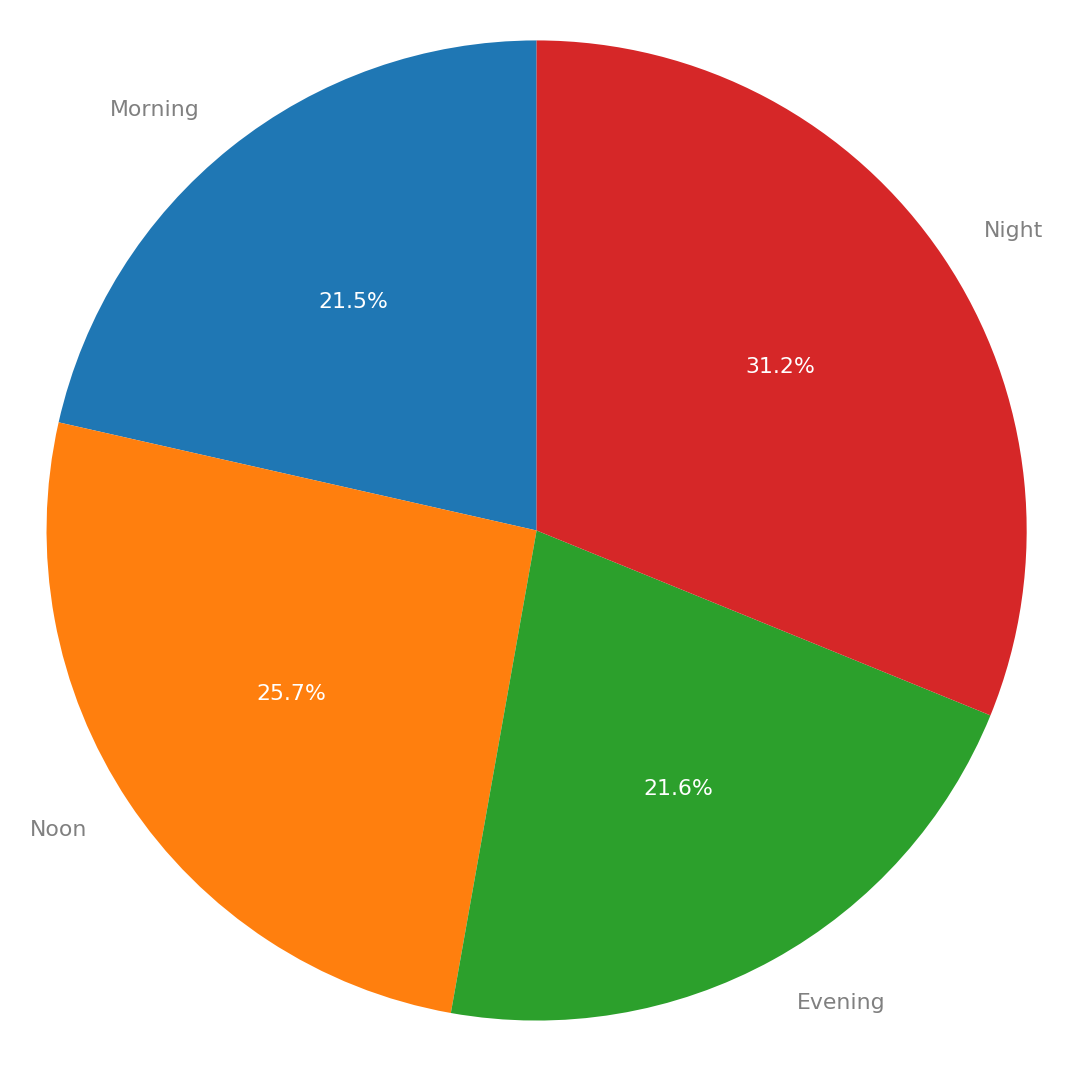

In [184]:
#Number of crimes committed in 2001 - 2017
#For Final Dataset

labels = ['Morning', 'Noon', 'Evening', 'Night']
sizes = [len(finaldatasets[finaldatasets['TimePeriod'] == 'Morning']),len(finaldatasets[finaldatasets['TimePeriod'] == 'Noon']),len(finaldatasets[finaldatasets['TimePeriod'] == 'Evening']),len(finaldatasets[finaldatasets['TimePeriod'] == 'Night'])]
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('white')
    
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.show()



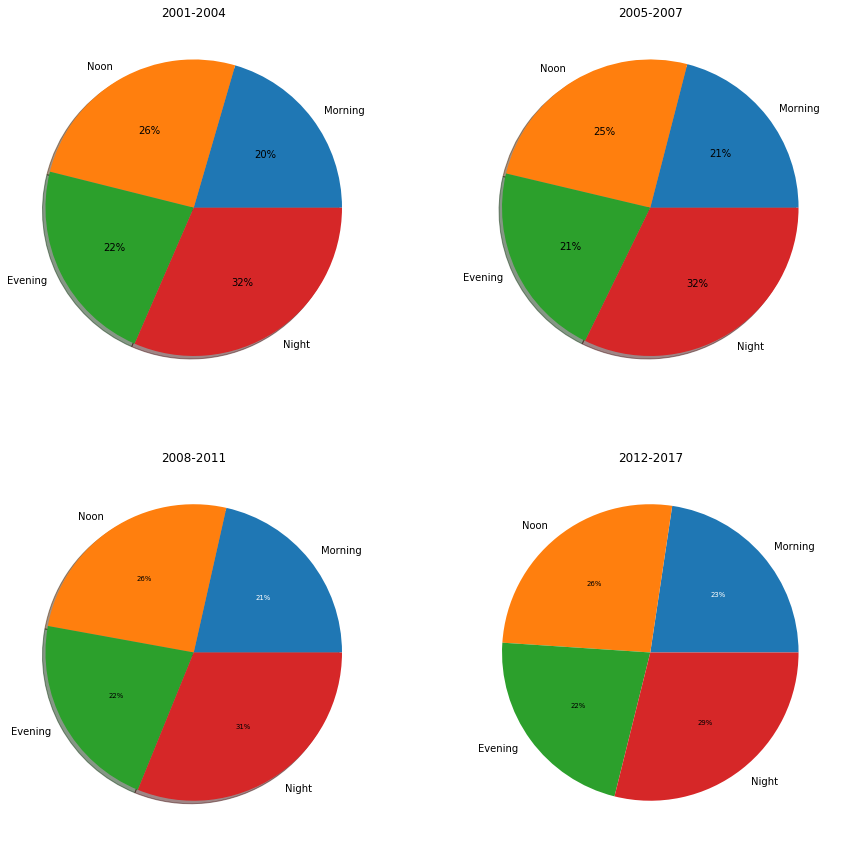

In [149]:
#Number of crimes committed in 2001 - 2004, 05-07,08-11,12-17

labels = ['Morning', 'Noon', 'Evening', 'Night']
sizes1 = [len(two1[two1['TimePeriod'] == 'Morning']),len(two1[two1['TimePeriod'] == 'Noon']),len(two1[two1['TimePeriod'] == 'Evening']),len(two1[two1['TimePeriod'] == 'Night'])]
sizes2 = [len(two5[two5['TimePeriod'] == 'Morning']),len(two5[two5['TimePeriod'] == 'Noon']),len(two5[two5['TimePeriod'] == 'Evening']),len(two5[two5['TimePeriod'] == 'Night'])]
sizes3 = [len(two8[two8['TimePeriod'] == 'Morning']),len(two8[two8['TimePeriod'] == 'Noon']),len(two8[two8['TimePeriod'] == 'Evening']),len(two8[two8['TimePeriod'] == 'Night'])]
sizes4 = [len(two12[two12['TimePeriod'] == 'Morning']),len(two12[two12['TimePeriod'] == 'Noon']),len(two12[two12['TimePeriod'] == 'Evening']),len(two12[two12['TimePeriod'] == 'Night'])]
# Make figure and axes
fig, axs = plt.subplots(2, 2)

# A standard pie plot
axs[0, 0].pie(sizes1, labels=labels, autopct='%.0f%%', shadow=True)
axs[0,0].set_title("2001-2004")


# Shift the second slice using explode
axs[0, 1].pie(sizes2, labels=labels, autopct='%.0f%%', shadow=True,
             )
axs[0,1].set_title("2005-2007")

# Adapt radius and text size for a smaller pie
patches, texts, autotexts = axs[1, 0].pie(sizes3, labels=labels,
                                          autopct='%.0f%%',
                                          shadow=True )
axs[1,0].set_title("2008-2011")
# Make percent texts even smaller
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

# Use a smaller explode and turn of the shadow for better visibility
patches, texts, autotexts = axs[1, 1].pie(sizes4, labels=labels,
                                          autopct='%.0f%%',
                                          shadow=False
                                        )
axs[1,1].set_title("2012-2017")
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

plt.show()

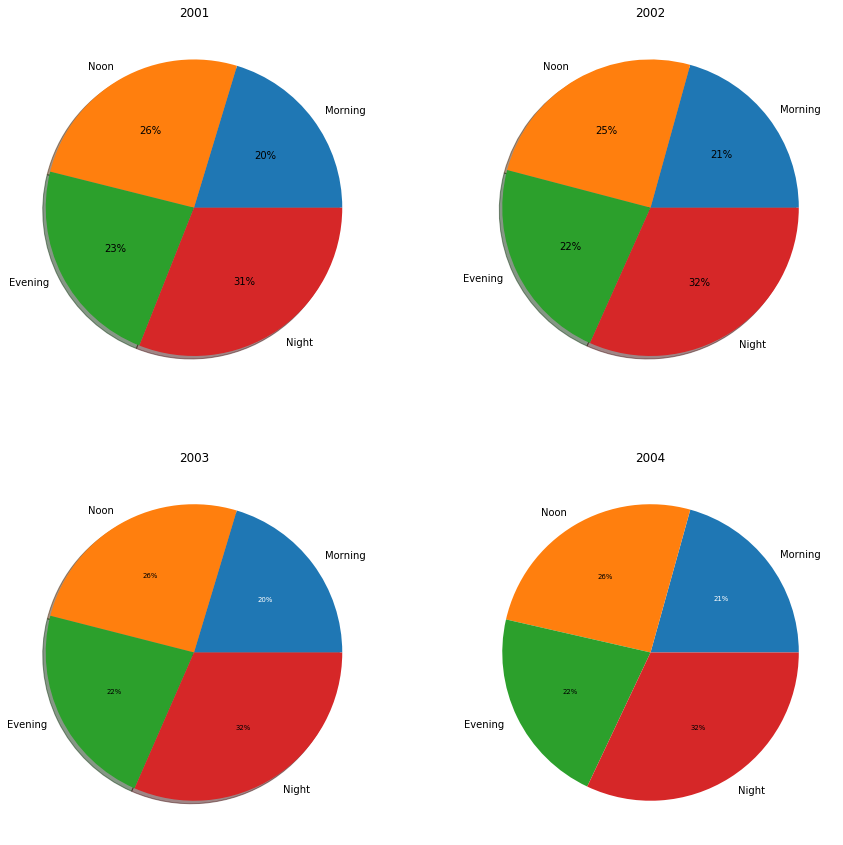

In [150]:
#Number of crimes committed in 2001 - 2004

labels = ['Morning', 'Noon', 'Evening', 'Night']
one = finaldatasets[finaldatasets['year'] == '2001']
two = finaldatasets[finaldatasets['year'] == '2002']
three = finaldatasets[finaldatasets['year'] == '2003']
four = finaldatasets[finaldatasets['year'] == '2004']
sizes1 = [len(one[one['TimePeriod'] == 'Morning']),len(one[one['TimePeriod'] == 'Noon']),len(one[one['TimePeriod'] == 'Evening']),len(one[one['TimePeriod'] == 'Night'])]
sizes2 = [len(two[two['TimePeriod'] == 'Morning']),len(two[two['TimePeriod'] == 'Noon']),len(two[two['TimePeriod'] == 'Evening']),len(two[two['TimePeriod'] == 'Night'])]
sizes3 = [len(three[three['TimePeriod'] == 'Morning']),len(three[three['TimePeriod'] == 'Noon']),len(three[three['TimePeriod'] == 'Evening']),len(three[three['TimePeriod'] == 'Night'])]
sizes4 = [len(four[four['TimePeriod'] == 'Morning']),len(four[four['TimePeriod'] == 'Noon']),len(four[four['TimePeriod'] == 'Evening']),len(four[four['TimePeriod'] == 'Night'])]
# Make figure and axes
fig, axs = plt.subplots(2, 2)

# A standard pie plot
axs[0, 0].pie(sizes1, labels=labels, autopct='%.0f%%', shadow=True)
axs[0,0].set_title("2001")


# Shift the second slice using explode
axs[0, 1].pie(sizes2, labels=labels, autopct='%.0f%%', shadow=True,
             )
axs[0,1].set_title("2002")

# Adapt radius and text size for a smaller pie
patches, texts, autotexts = axs[1, 0].pie(sizes3, labels=labels,
                                          autopct='%.0f%%',
                                          shadow=True )
axs[1,0].set_title("2003")
# Make percent texts even smaller
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

# Use a smaller explode and turn of the shadow for better visibility
patches, texts, autotexts = axs[1, 1].pie(sizes4, labels=labels,
                                          autopct='%.0f%%',
                                          shadow=False
                                        )
axs[1,1].set_title("2004")
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

plt.show()

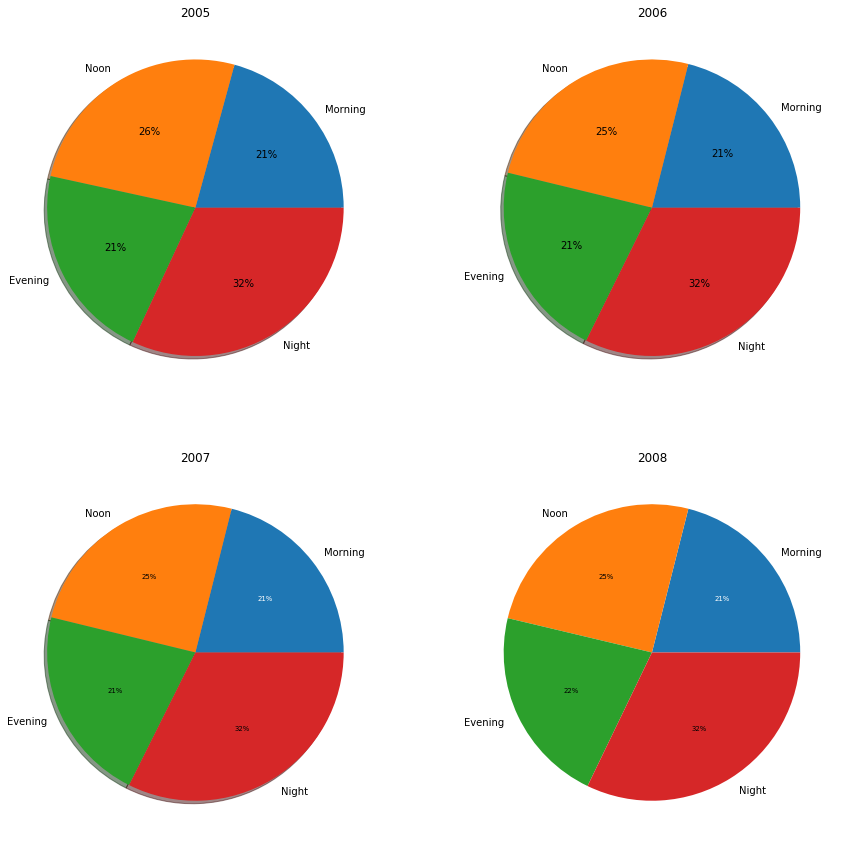

In [151]:
#Number of crimes committed in 2005 - 2008

labels = ['Morning', 'Noon', 'Evening', 'Night']
one = finaldatasets[finaldatasets['year'] == '2005']
two = finaldatasets[finaldatasets['year'] == '2006']
three = finaldatasets[finaldatasets['year'] == '2007']
four = finaldatasets[finaldatasets['year'] == '2008']
sizes1 = [len(one[one['TimePeriod'] == 'Morning']),len(one[one['TimePeriod'] == 'Noon']),len(one[one['TimePeriod'] == 'Evening']),len(one[one['TimePeriod'] == 'Night'])]
sizes2 = [len(two[two['TimePeriod'] == 'Morning']),len(two[two['TimePeriod'] == 'Noon']),len(two[two['TimePeriod'] == 'Evening']),len(two[two['TimePeriod'] == 'Night'])]
sizes3 = [len(three[three['TimePeriod'] == 'Morning']),len(three[three['TimePeriod'] == 'Noon']),len(three[three['TimePeriod'] == 'Evening']),len(three[three['TimePeriod'] == 'Night'])]
sizes4 = [len(four[four['TimePeriod'] == 'Morning']),len(four[four['TimePeriod'] == 'Noon']),len(four[four['TimePeriod'] == 'Evening']),len(four[four['TimePeriod'] == 'Night'])]
# Make figure and axes
fig, axs = plt.subplots(2, 2)

# A standard pie plot
axs[0, 0].pie(sizes1, labels=labels, autopct='%.0f%%', shadow=True)
axs[0,0].set_title("2005")


# Shift the second slice using explode
axs[0, 1].pie(sizes2, labels=labels, autopct='%.0f%%', shadow=True,
             )
axs[0,1].set_title("2006")

# Adapt radius and text size for a smaller pie
patches, texts, autotexts = axs[1, 0].pie(sizes3, labels=labels,
                                          autopct='%.0f%%',
                                          shadow=True )
axs[1,0].set_title("2007")
# Make percent texts even smaller
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

# Use a smaller explode and turn of the shadow for better visibility
patches, texts, autotexts = axs[1, 1].pie(sizes4, labels=labels,
                                          autopct='%.0f%%',
                                          shadow=False
                                        )
axs[1,1].set_title("2008")
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

plt.show()

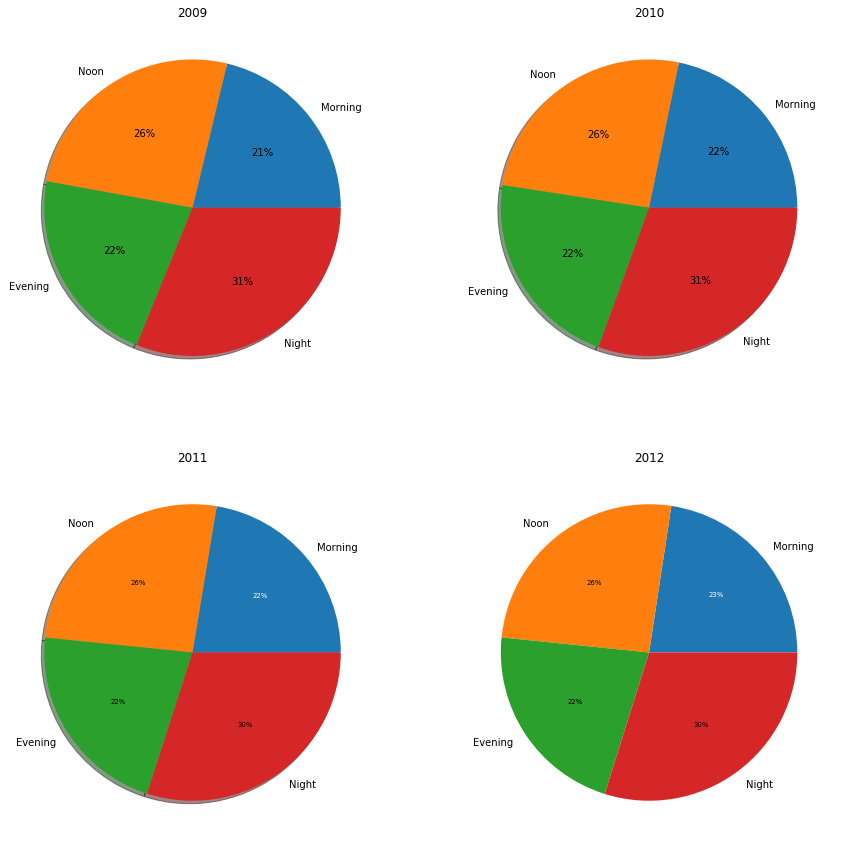

In [152]:
#Number of crimes committed in 2009 - 2012

labels = ['Morning', 'Noon', 'Evening', 'Night']
one = finaldatasets[finaldatasets['year'] == '2009']
two = finaldatasets[finaldatasets['year'] == '2010']
three = finaldatasets[finaldatasets['year'] == '2011']
four = finaldatasets[finaldatasets['year'] == '2012']
sizes1 = [len(one[one['TimePeriod'] == 'Morning']),len(one[one['TimePeriod'] == 'Noon']),len(one[one['TimePeriod'] == 'Evening']),len(one[one['TimePeriod'] == 'Night'])]
sizes2 = [len(two[two['TimePeriod'] == 'Morning']),len(two[two['TimePeriod'] == 'Noon']),len(two[two['TimePeriod'] == 'Evening']),len(two[two['TimePeriod'] == 'Night'])]
sizes3 = [len(three[three['TimePeriod'] == 'Morning']),len(three[three['TimePeriod'] == 'Noon']),len(three[three['TimePeriod'] == 'Evening']),len(three[three['TimePeriod'] == 'Night'])]
sizes4 = [len(four[four['TimePeriod'] == 'Morning']),len(four[four['TimePeriod'] == 'Noon']),len(four[four['TimePeriod'] == 'Evening']),len(four[four['TimePeriod'] == 'Night'])]
# Make figure and axes
fig, axs = plt.subplots(2, 2)

# A standard pie plot
axs[0, 0].pie(sizes1, labels=labels, autopct='%.0f%%', shadow=True)
axs[0,0].set_title("2009")


# Shift the second slice using explode
axs[0, 1].pie(sizes2, labels=labels, autopct='%.0f%%', shadow=True,
             )
axs[0,1].set_title("2010")

# Adapt radius and text size for a smaller pie
patches, texts, autotexts = axs[1, 0].pie(sizes3, labels=labels,
                                          autopct='%.0f%%',
                                          shadow=True )
axs[1,0].set_title("2011")
# Make percent texts even smaller
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

# Use a smaller explode and turn of the shadow for better visibility
patches, texts, autotexts = axs[1, 1].pie(sizes4, labels=labels,
                                          autopct='%.0f%%',
                                          shadow=False
                                        )
axs[1,1].set_title("2012")
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

plt.show()

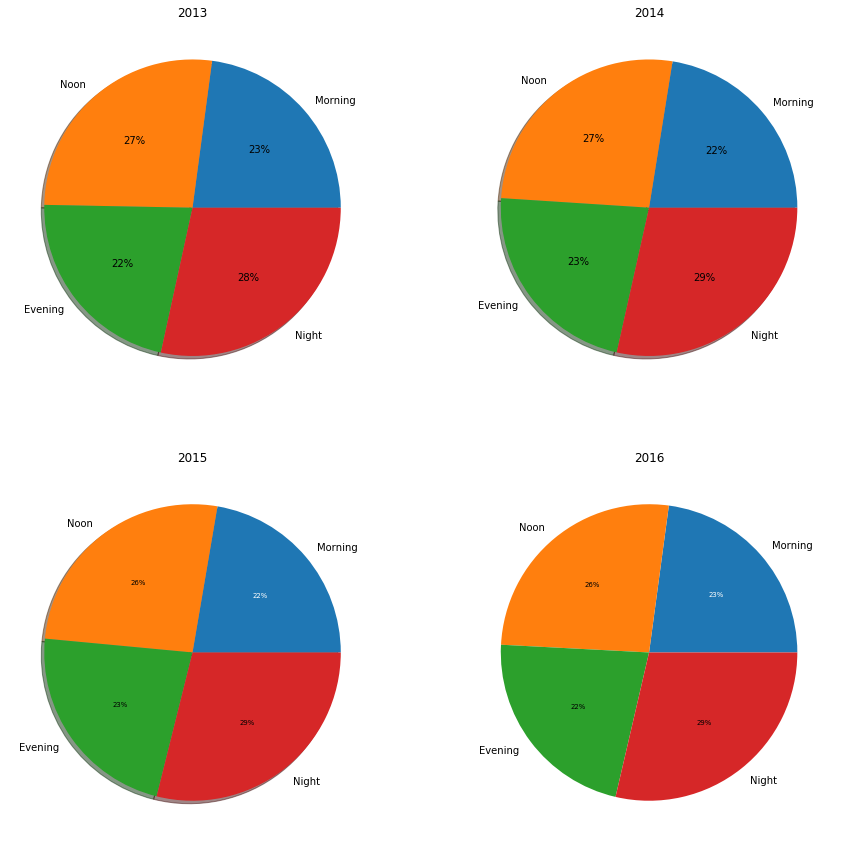

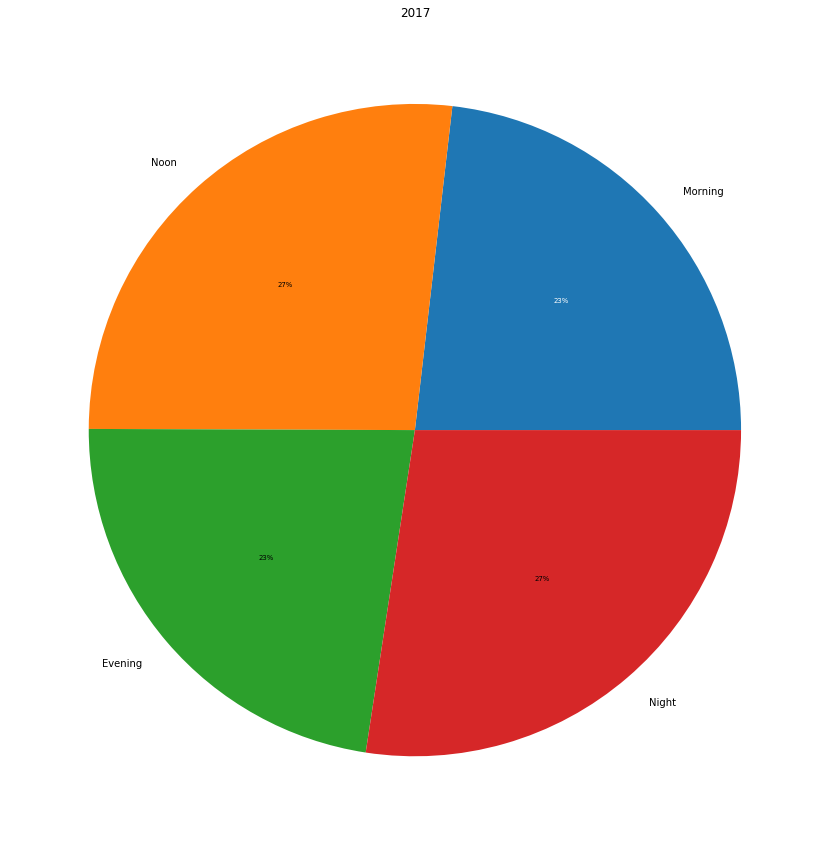

In [153]:
#Number of crimes committed in 2013 - 2017

labels = ['Morning', 'Noon', 'Evening', 'Night']
one = finaldatasets[finaldatasets['year'] == '2013']
two = finaldatasets[finaldatasets['year'] == '2014']
three = finaldatasets[finaldatasets['year'] == '2015']
four = finaldatasets[finaldatasets['year'] == '2016']
five = finaldatasets[finaldatasets['year'] == '2017']
sizes1 = [len(one[one['TimePeriod'] == 'Morning']),len(one[one['TimePeriod'] == 'Noon']),len(one[one['TimePeriod'] == 'Evening']),len(one[one['TimePeriod'] == 'Night'])]
sizes2 = [len(two[two['TimePeriod'] == 'Morning']),len(two[two['TimePeriod'] == 'Noon']),len(two[two['TimePeriod'] == 'Evening']),len(two[two['TimePeriod'] == 'Night'])]
sizes3 = [len(three[three['TimePeriod'] == 'Morning']),len(three[three['TimePeriod'] == 'Noon']),len(three[three['TimePeriod'] == 'Evening']),len(three[three['TimePeriod'] == 'Night'])]
sizes4 = [len(four[four['TimePeriod'] == 'Morning']),len(four[four['TimePeriod'] == 'Noon']),len(four[four['TimePeriod'] == 'Evening']),len(four[four['TimePeriod'] == 'Night'])]
sizes5 = [len(five[five['TimePeriod'] == 'Morning']),len(five[five['TimePeriod'] == 'Noon']),len(five[five['TimePeriod'] == 'Evening']),len(five[five['TimePeriod'] == 'Night'])]
# Make figure and axes
fig, axs = plt.subplots(2, 2)

# A standard pie plot
axs[0, 0].pie(sizes1, labels=labels, autopct='%.0f%%', shadow=True)
axs[0,0].set_title("2013")


# Shift the second slice using explode
axs[0, 1].pie(sizes2, labels=labels, autopct='%.0f%%', shadow=True,
             )
axs[0,1].set_title("2014")

# Adapt radius and text size for a smaller pie
patches, texts, autotexts = axs[1, 0].pie(sizes3, labels=labels,
                                          autopct='%.0f%%',
                                          shadow=True )
axs[1,0].set_title("2015")
# Make percent texts even smaller
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

# Use a smaller explode and turn of the shadow for better visibility
patches, texts, autotexts = axs[1, 1].pie(sizes4, labels=labels,
                                          autopct='%.0f%%',
                                          shadow=False
                                        )
axs[1,1].set_title("2016")
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

plt.show()

fig1, axs = plt.subplots()

# A standard pie plot
patches, texts, autotexts = axs.pie(sizes5, labels=labels,
                                          autopct='%.0f%%',
                                          shadow=False
                                        )
axs.set_title("2017")
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

plt.show()


In [155]:
#Grouped Bar Graphs
finaldatasets = finaldatasets[finaldatasets['Major Section'] != 0.0]
finaldatasets = finaldatasets[finaldatasets['Community Area'].isna() != True]

In [ ]:
finaldatasets['Major Section'].unique()

In [ ]:
finaldatasets['Primary Crime Type'].unique()

In [ ]:
# finaldatasets = finaldatasets.sample(n=200)

In [ ]:
fss = finaldatasets[finaldatasets['Major Section'] == 'Far Southeast side']
sws = finaldatasets[finaldatasets['Major Section'] == 'Southwest side']
ns = finaldatasets[finaldatasets['Major Section'] == 'North side']
nws = finaldatasets[finaldatasets['Major Section'] == 'Northwest side']
ws = finaldatasets[finaldatasets['Major Section'] == 'West side']
fsws = finaldatasets[finaldatasets['Major Section'] == 'Far Southwest side']
central = finaldatasets[finaldatasets['Major Section'] == 'Central']
fns = finaldatasets[finaldatasets['Major Section'] == 'Far North side']
ss = finaldatasets[finaldatasets['Major Section'] == 'South side']

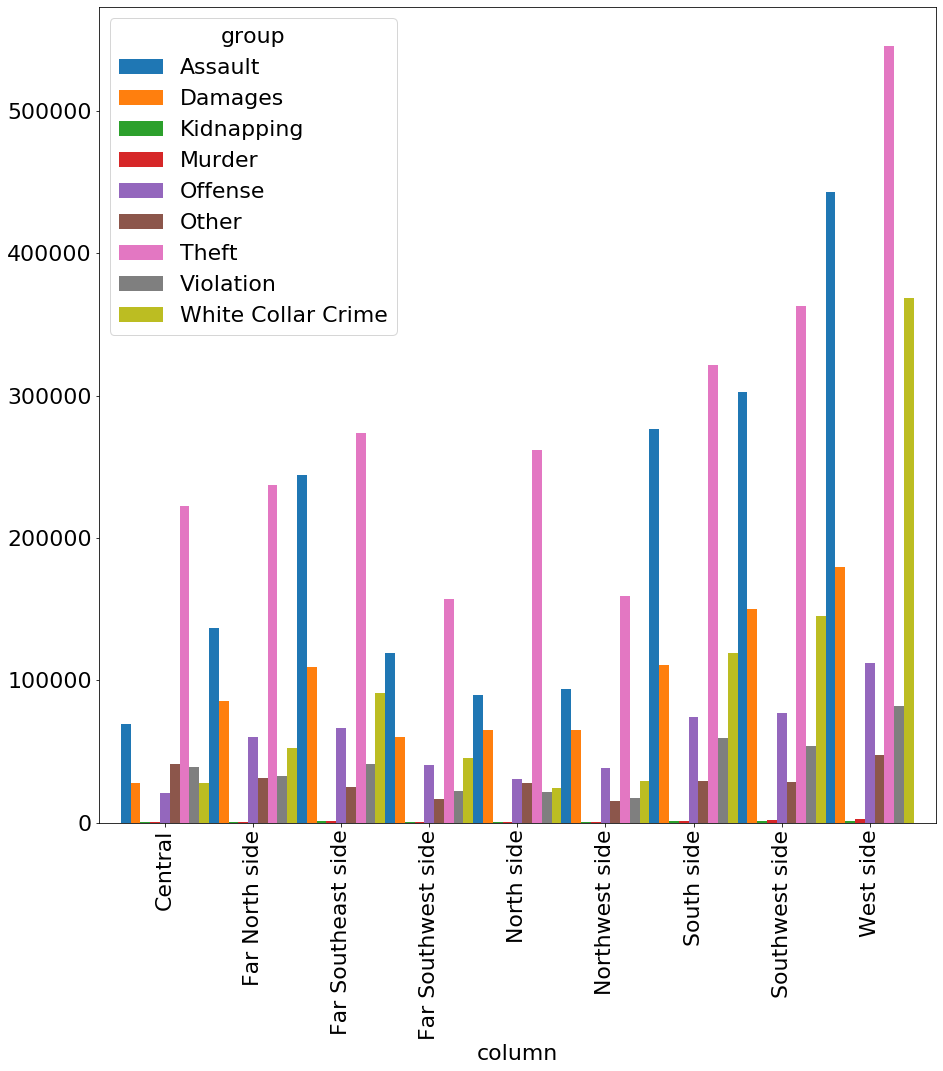

<Figure size 1440x216 with 0 Axes>

In [185]:
fss.reset_index()
sws.reset_index()
nws.reset_index()
df = pd.DataFrame(
    [['Theft','Far Southeast side',len(fss[fss['Primary Crime Type'] == 'THEFT'])],
     ['Offense','Far Southeast side',len(fss[fss['Primary Crime Type'] == 'OFFENSE'])],
     ['Assault','Far Southeast side',len(fss[fss['Primary Crime Type'] == 'ASSAULT'])],
     ['Other','Far Southeast side',len(fss[fss['Primary Crime Type'] == 'OTHER'])], 
     ['Violation','Far Southeast side',len(fss[fss['Primary Crime Type'] == 'VIOLATION'])],
     ['White Collar Crime','Far Southeast side',len(fss[fss['Primary Crime Type'] == 'WHITE COLLAR CRIME'])],
     ['Damages','Far Southeast side',len(fss[fss['Primary Crime Type'] == 'DAMAGES'])],
     ['Murder','Far Southeast side',len(fss[fss['Primary Crime Type'] == 'MURDER'])],
     ['Kidnapping','Far Southeast side',len(fss[fss['Primary Crime Type'] == 'KIDNAPPING'])],
    ['Theft','Southwest side',len(sws[sws['Primary Crime Type'] == 'THEFT'])],
     ['Offense','Southwest side',len(sws[sws['Primary Crime Type'] == 'OFFENSE'])],
     ['Assault','Southwest side',len(sws[sws['Primary Crime Type'] == 'ASSAULT'])],
     ['Other','Southwest side',len(sws[sws['Primary Crime Type'] == 'OTHER'])], 
     ['Violation','Southwest side',len(sws[sws['Primary Crime Type'] == 'VIOLATION'])],
     ['White Collar Crime','Southwest side',len(sws[sws['Primary Crime Type'] == 'WHITE COLLAR CRIME'])],
     ['Damages','Southwest side',len(sws[sws['Primary Crime Type'] == 'DAMAGES'])],
     ['Murder','Southwest side',len(sws[sws['Primary Crime Type'] == 'MURDER'])],
     ['Kidnapping','Southwest side',len(sws[sws['Primary Crime Type'] == 'KIDNAPPING'])],
     ['Theft','Northwest side',len(nws[nws['Primary Crime Type'] == 'THEFT'])],
     ['Offense','Northwest side',len(nws[nws['Primary Crime Type'] == 'OFFENSE'])],
     ['Assault','Northwest side',len(nws[nws['Primary Crime Type'] == 'ASSAULT'])],
     ['Other','Northwest side',len(nws[nws['Primary Crime Type'] == 'OTHER'])], 
     ['Violation','Northwest side',len(nws[nws['Primary Crime Type'] == 'VIOLATION'])],
     ['White Collar Crime','Northwest side',len(nws[nws['Primary Crime Type'] == 'WHITE COLLAR CRIME'])],
     ['Damages','Northwest side',len(nws[nws['Primary Crime Type'] == 'DAMAGES'])],
     ['Murder','Northwest side',len(nws[nws['Primary Crime Type'] == 'MURDER'])],
     ['Kidnapping','Northwest side',len(nws[nws['Primary Crime Type'] == 'KIDNAPPING'])],
     ['Theft','North side',len(ns[ns['Primary Crime Type'] == 'THEFT'])],
     ['Offense','North side',len(ns[ns['Primary Crime Type'] == 'OFFENSE'])],
     ['Assault','North side',len(ns[ns['Primary Crime Type'] == 'ASSAULT'])],
     ['Other','North side',len(ns[ns['Primary Crime Type'] == 'OTHER'])], 
     ['Violation','North side',len(ns[ns['Primary Crime Type'] == 'VIOLATION'])],
     ['White Collar Crime','North side',len(ns[ns['Primary Crime Type'] == 'WHITE COLLAR CRIME'])],
     ['Damages','North side',len(ns[ns['Primary Crime Type'] == 'DAMAGES'])],
     ['Murder','North side',len(ns[ns['Primary Crime Type'] == 'MURDER'])],
     ['Kidnapping','North side',len(ns[ns['Primary Crime Type'] == 'KIDNAPPING'])],
     ['Theft','West side',len(ws[ws['Primary Crime Type'] == 'THEFT'])],
     ['Offense','West side',len(ws[ws['Primary Crime Type'] == 'OFFENSE'])],
     ['Assault','West side',len(ws[ws['Primary Crime Type'] == 'ASSAULT'])],
     ['Other','West side',len(ws[ws['Primary Crime Type'] == 'OTHER'])], 
     ['Violation','West side',len(ws[ws['Primary Crime Type'] == 'VIOLATION'])],
     ['White Collar Crime','West side',len(ws[ws['Primary Crime Type'] == 'WHITE COLLAR CRIME'])],
     ['Damages','West side',len(ws[ws['Primary Crime Type'] == 'DAMAGES'])],
     ['Murder','West side',len(ws[ws['Primary Crime Type'] == 'MURDER'])],
     ['Kidnapping','West side',len(ws[ws['Primary Crime Type'] == 'KIDNAPPING'])],
     ['Theft','Far Southwest side',len(fsws[fsws['Primary Crime Type'] == 'THEFT'])],
     ['Offense','Far Southwest side',len(fsws[fsws['Primary Crime Type'] == 'OFFENSE'])],
     ['Assault','Far Southwest side',len(fsws[fsws['Primary Crime Type'] == 'ASSAULT'])],
     ['Other','Far Southwest side',len(fsws[fsws['Primary Crime Type'] == 'OTHER'])], 
     ['Violation','Far Southwest side',len(fsws[fsws['Primary Crime Type'] == 'VIOLATION'])],
     ['White Collar Crime','Far Southwest side',len(fsws[fsws['Primary Crime Type'] == 'WHITE COLLAR CRIME'])],
     ['Damages','Far Southwest side',len(fsws[fsws['Primary Crime Type'] == 'DAMAGES'])],
     ['Murder','Far Southwest side',len(fsws[fsws['Primary Crime Type'] == 'MURDER'])],
     ['Kidnapping','Far Southwest side',len(fsws[fsws['Primary Crime Type'] == 'KIDNAPPING'])],
     ['Theft','Central',len(central[central['Primary Crime Type'] == 'THEFT'])],
     ['Offense','Central',len(central[central['Primary Crime Type'] == 'OFFENSE'])],
     ['Assault','Central',len(central[central['Primary Crime Type'] == 'ASSAULT'])],
     ['Other','Central',len(central[central['Primary Crime Type'] == 'OTHER'])], 
     ['Violation','Central',len(central[central['Primary Crime Type'] == 'VIOLATION'])],
     ['White Collar Crime','Central',len(central[central['Primary Crime Type'] == 'WHITE COLLAR CRIME'])],
     ['Damages','Central',len(central[central['Primary Crime Type'] == 'DAMAGES'])],
     ['Murder','Central',len(central[central['Primary Crime Type'] == 'MURDER'])],
     ['Kidnapping','Central',len(central[central['Primary Crime Type'] == 'KIDNAPPING'])],
     ['Theft','Far North side',len(fns[fns['Primary Crime Type'] == 'THEFT'])],
     ['Offense','Far North side',len(fns[fns['Primary Crime Type'] == 'OFFENSE'])],
     ['Assault','Far North side',len(fns[fns['Primary Crime Type'] == 'ASSAULT'])],
     ['Other','Far North side',len(fns[fns['Primary Crime Type'] == 'OTHER'])], 
     ['Violation','Far North side',len(fns[fns['Primary Crime Type'] == 'VIOLATION'])],
     ['White Collar Crime','Far North side',len(fns[fns['Primary Crime Type'] == 'WHITE COLLAR CRIME'])],
     ['Damages','Far North side',len(fns[fns['Primary Crime Type'] == 'DAMAGES'])],
     ['Murder','Far North side',len(fns[fns['Primary Crime Type'] == 'MURDER'])],
     ['Kidnapping','Far North side',len(fns[fns['Primary Crime Type'] == 'KIDNAPPING'])],
     ['Theft','South side',len(ss[ss['Primary Crime Type'] == 'THEFT'])],
     ['Offense','South side',len(ss[ss['Primary Crime Type'] == 'OFFENSE'])],
     ['Assault','South side',len(ss[ss['Primary Crime Type'] == 'ASSAULT'])],
     ['Other','South side',len(ss[ss['Primary Crime Type'] == 'OTHER'])], 
     ['Violation','South side',len(ss[ss['Primary Crime Type'] == 'VIOLATION'])],
     ['White Collar Crime','South side',len(ss[ss['Primary Crime Type'] == 'WHITE COLLAR CRIME'])],
     ['Damages','South side',len(ss[ss['Primary Crime Type'] == 'DAMAGES'])],
     ['Murder','South side',len(ss[ss['Primary Crime Type'] == 'MURDER'])],
     ['Kidnapping','South side',len(ss[ss['Primary Crime Type'] == 'KIDNAPPING'])]
    ],
    
    columns=['group','column','val'])

df.reset_index().pivot("column", "group", "val").plot(kind='bar', width=1.0)
# plt.rcParams['figure.figsize'] = (50,50)
plt.figure(figsize=(20, 3))
plt.show()

In [186]:
uniq_crimes = finaldatasets['Primary Crime Type'].unique()
list(uniq_crimes)

['THEFT',
 'ASSAULT',
 'OFFENSE',
 'OTHER',
 'WHITE COLLAR CRIME',
 'DAMAGES',
 'MURDER',
 'VIOLATION',
 'KIDNAPPING']

Text(0, 0.5, 'Count')

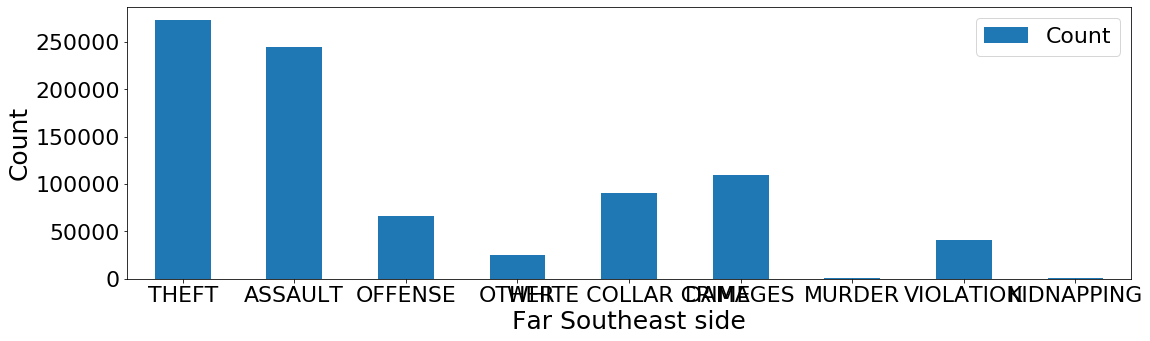

In [187]:
vals = []
for crime in list(uniq_crimes):
    vals.append(len(fss[fss['Primary Crime Type'] == crime]))
df = pd.DataFrame({'lab':list(uniq_crimes), 'Count':vals})
ax = df.plot.bar(x='lab', y='Count', rot=0, figsize = (18,5))
# plt.subplots(figsize=(18,5))
fig.suptitle('test title', fontsize=200)
plt.xlabel('Far Southeast side', fontsize=25)
plt.ylabel('Count', fontsize=25)

Text(0, 0.5, 'Count')

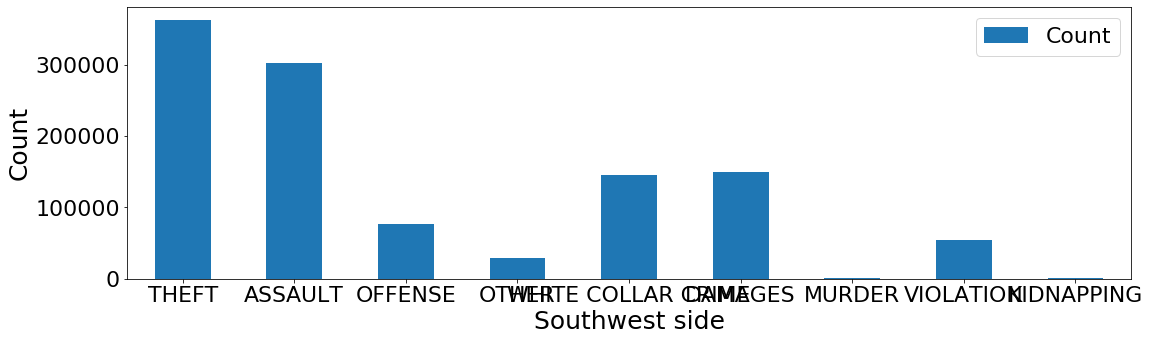

In [188]:
vals = []
for crime in list(uniq_crimes):
    vals.append(len(sws[sws['Primary Crime Type'] == crime]))
df = pd.DataFrame({'lab':list(uniq_crimes), 'Count':vals})
ax = df.plot.bar(x='lab', y='Count', rot=0, figsize = (18,5))
# plt.subplots(figsize=(18,5))
fig.suptitle('test title', fontsize=200)
plt.xlabel('Southwest side', fontsize=25)
plt.ylabel('Count', fontsize=25)

Text(0, 0.5, 'Count')

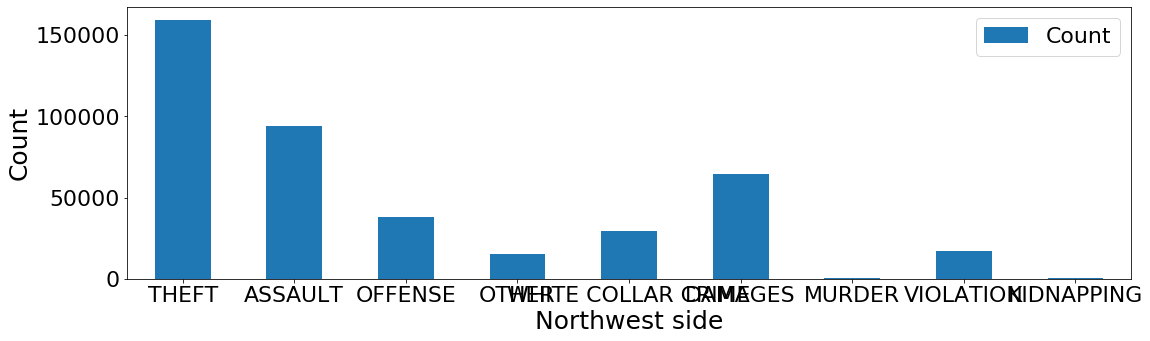

In [189]:
vals = []
for crime in list(uniq_crimes):
    vals.append(len(nws[nws['Primary Crime Type'] == crime]))
df = pd.DataFrame({'lab':list(uniq_crimes), 'Count':vals})
ax = df.plot.bar(x='lab', y='Count', rot=0, figsize = (18,5))
# plt.subplots(figsize=(18,5))
fig.suptitle('test title', fontsize=200)
plt.xlabel('Northwest side', fontsize=25)
plt.ylabel('Count', fontsize=25)

Text(0, 0.5, 'Count')

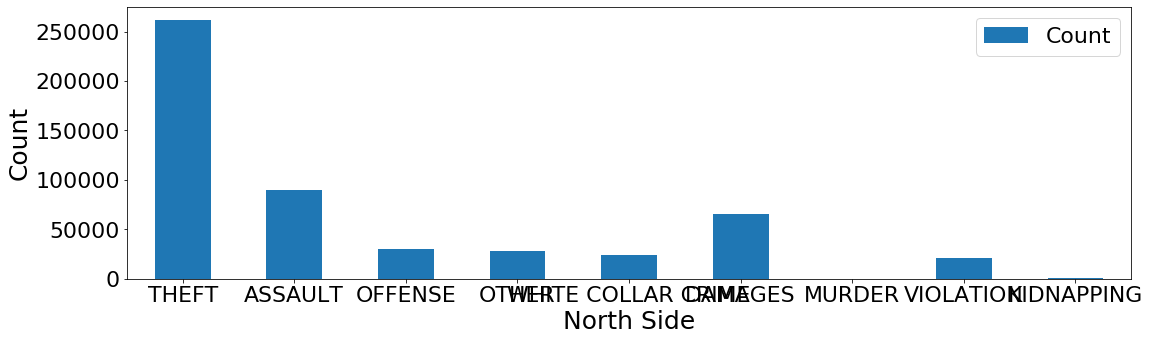

In [190]:
vals = []
for crime in list(uniq_crimes):
    vals.append(len(ns[ns['Primary Crime Type'] == crime]))
df = pd.DataFrame({'lab':list(uniq_crimes), 'Count':vals})
ax = df.plot.bar(x='lab', y='Count', rot=0, figsize = (18,5))
# plt.subplots(figsize=(18,5))
fig.suptitle('test title', fontsize=200)
plt.xlabel('North Side', fontsize=25)
plt.ylabel('Count', fontsize=25)

Text(0, 0.5, 'Count')

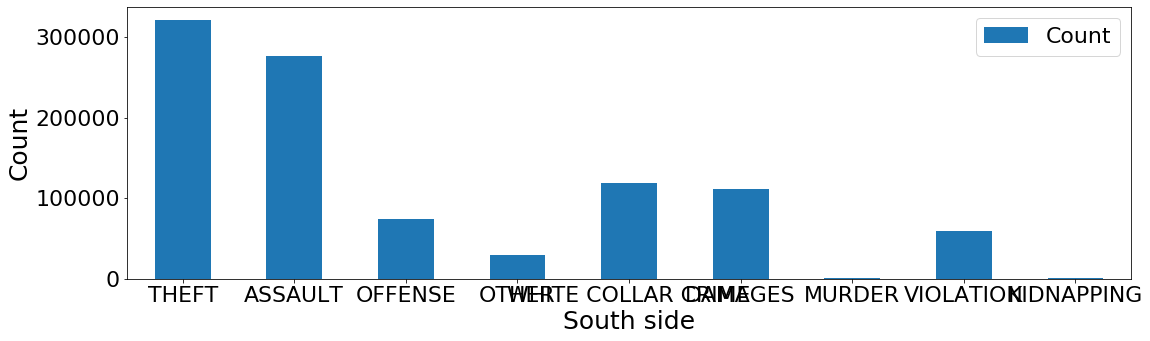

In [191]:
vals = []
for crime in list(uniq_crimes):
    vals.append(len(ss[ss['Primary Crime Type'] == crime]))
df = pd.DataFrame({'lab':list(uniq_crimes), 'Count':vals})
ax = df.plot.bar(x='lab', y='Count', rot=0, figsize = (18,5))
# plt.subplots(figsize=(18,5))
fig.suptitle('test title', fontsize=200)
plt.xlabel('South side', fontsize=25)
plt.ylabel('Count', fontsize=25)

Text(0, 0.5, 'Count')

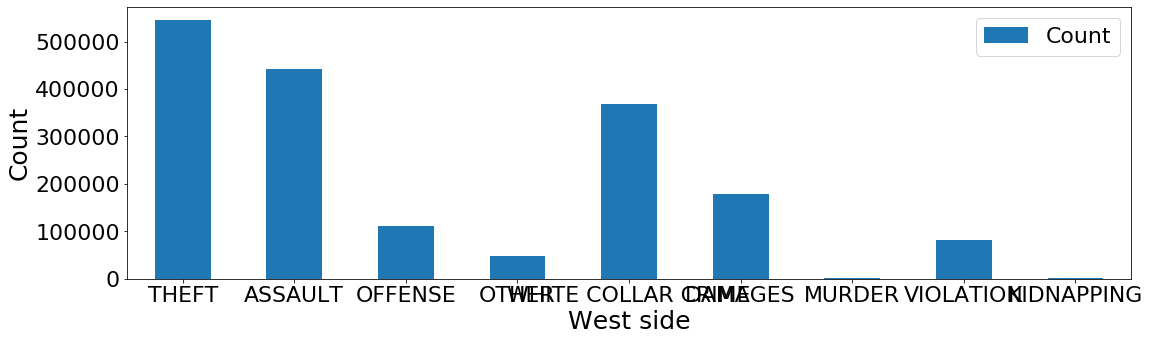

In [192]:
vals = []
for crime in list(uniq_crimes):
    vals.append(len(ws[ws['Primary Crime Type'] == crime]))
df = pd.DataFrame({'lab':list(uniq_crimes), 'Count':vals})
ax = df.plot.bar(x='lab', y='Count', rot=0, figsize = (18,5))
# plt.subplots(figsize=(18,5))
fig.suptitle('test title', fontsize=200)
plt.xlabel('West side', fontsize=25)
plt.ylabel('Count', fontsize=25)

Text(0, 0.5, 'Count')

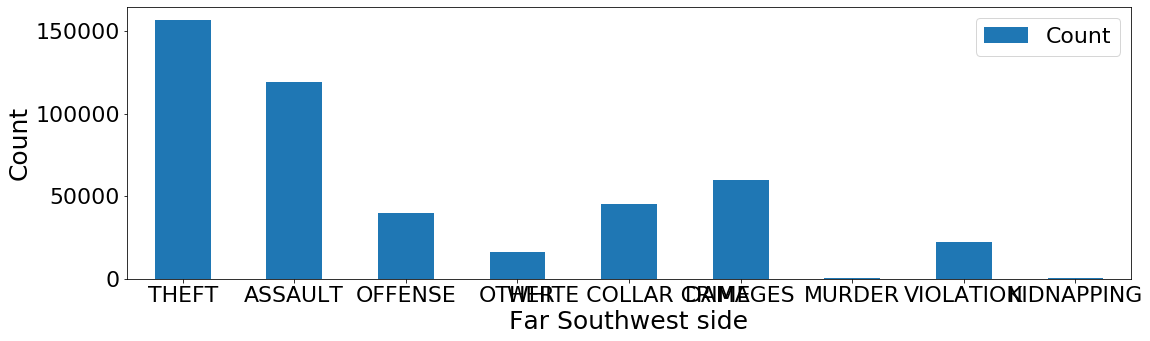

In [196]:
vals = []
for crime in list(uniq_crimes):
    vals.append(len(fsws[fsws['Primary Crime Type'] == crime]))
df = pd.DataFrame({'lab':list(uniq_crimes), 'Count':vals})
ax = df.plot.bar(x='lab', y='Count', rot=0, figsize = (18,5))
# plt.subplots(figsize=(18,5))
fig.suptitle('test title', fontsize=200)
plt.xlabel('Far Southwest side', fontsize=25)
plt.ylabel('Count', fontsize=25)

Text(0, 0.5, 'Count')

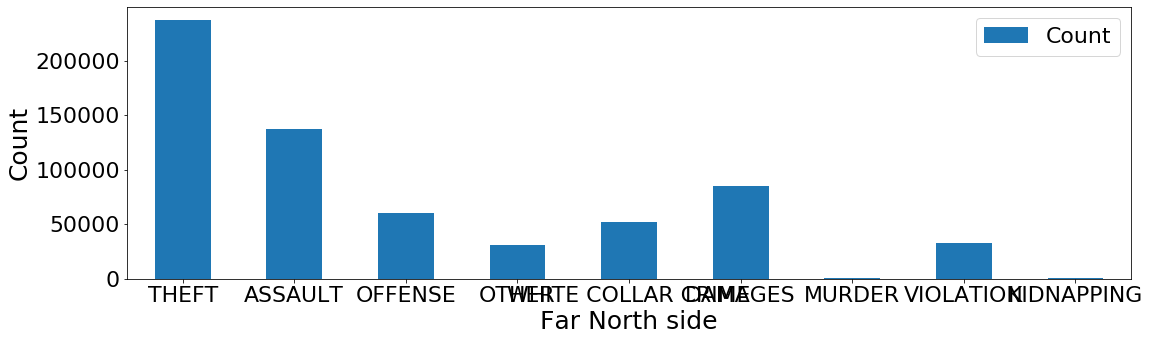

In [197]:
vals = []
for crime in list(uniq_crimes):
    vals.append(len(fns[fns['Primary Crime Type'] == crime]))
df = pd.DataFrame({'lab':list(uniq_crimes), 'Count':vals})
ax = df.plot.bar(x='lab', y='Count', rot=0, figsize = (18,5))
# plt.subplots(figsize=(18,5))
fig.suptitle('test title', fontsize=200)
plt.xlabel('Far North side', fontsize=25)
plt.ylabel('Count', fontsize=25)

Text(0, 0.5, 'Count')

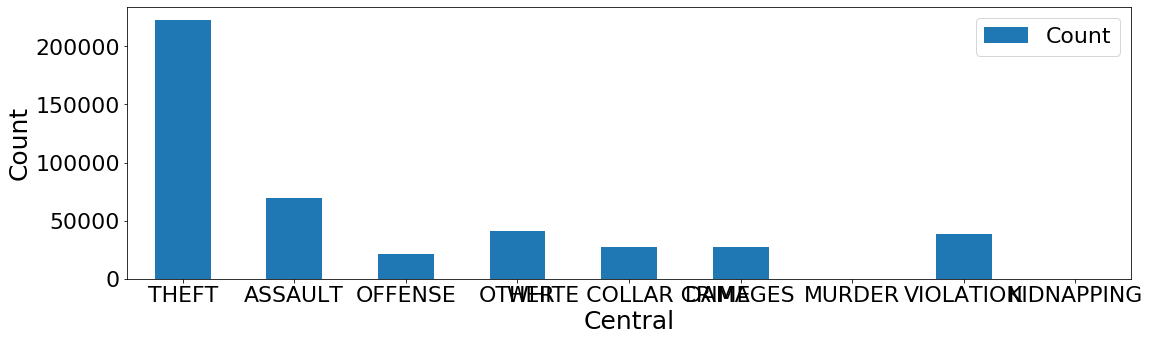

In [198]:
vals = []
for crime in list(uniq_crimes):
    vals.append(len(central[central['Primary Crime Type'] == crime]))
df = pd.DataFrame({'lab':list(uniq_crimes), 'Count':vals})
ax = df.plot.bar(x='lab', y='Count', rot=0, figsize = (18,5))
# plt.subplots(figsize=(18,5))
fig.suptitle('test title', fontsize=200)
plt.xlabel('Central', fontsize=25)
plt.ylabel('Count', fontsize=25)

In [156]:
#Classification

In [157]:
#Finding Correlation

corr_matrix = finaldatasets.corr().abs()
corr_matrix.head()
# x_train, x_test, y_train, y_test = train_test_split(finaldatasets[['Total Population','Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Rural','Percent Less than Bachelor\'s Degree']], df['Party'], random_state = 0, test_size = 0.25)


,District,Community Area,Year
District,1.00000,0.498560,0.001870
Community Area,0.49856,1.000000,0.000188
Year,0.00187,0.000188,1.000000


In [158]:
finaldatasets = finaldatasets[finaldatasets['Loc Type'] != '']
finaldatasets = finaldatasets[finaldatasets['Community Area'].isnull() != True]

In [159]:
finaldatasets['Loc Type N'] = finaldatasets['Loc Type'].replace({'RESIDENTIAL':1,'OTHER':2,'COMMERCIAL':3,'PUBLIC':4,'HEALTHCARE FACILITY':5,'PLACE OF WORSHIP':6,'EDUCATION':7,'PRIVATE':8,'GOVERNMENT':9})


In [160]:
finaldatasets['Major Section N'] = finaldatasets['Major Section'].replace({'Far Southeast side': 1,
 'Southwest side': 2,
 'North side': 3,
 'Northwest side': 4,
 'West side': 5,
 'Far Southwest side': 6,
 'Central': 7,
 'Far North side': 8,
 'South side': 9})

In [161]:
finaldatasets['Primary Crime Type N'] = finaldatasets['Primary Crime Type'].replace({'THEFT': 1,
 'OFFENSE': 2,
 'ASSAULT': 3,
 'OTHER': 4,
 'VIOLATION': 5,
 'WHITE COLLAR CRIME': 6,
 'DAMAGES': 7,
 'MURDER': 8,
 'KIDNAPPING': 9})

In [162]:
finaldatasets['Arrest N'] = np.where(finaldatasets['Arrest']=='True', 1, 0)

In [163]:
finaldatasets['TimePeriod N'] = finaldatasets['TimePeriod'].replace({'Night': 1, 'Morning': 2, 'Evening': 3, 'Noon': 4})

In [164]:
finaldatasets.columns

Index(['Date', 'Primary Type', 'Location Description', 'Arrest', 'District',
       'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'date_id1',
       'date_id2', 'day', 'month', 'year', 'Seasons', 'hour', 'minute',
       'second', 'dayperiod', 'TimePeriod', 'Major Section',
       'Primary Crime Type', 'Loc Type', 'Loc Type N', 'Major Section N',
       'Primary Crime Type N', 'Arrest N', 'TimePeriod N'],
      dtype='object')

In [165]:
corr_matrix = finaldatasets.corr().abs()
corr_matrix

,District,Community Area,Year,Loc Type N,Major Section N,Primary Crime Type N,Arrest N,TimePeriod N
District,1.000000,0.498559,0.002015,0.018129,0.054199,0.018806,0.001308,0.027981
Community Area,0.498559,1.000000,0.000415,0.037661,0.233335,0.030205,0.001390,0.008540
Year,0.002015,0.000415,1.000000,0.016252,0.004490,0.028458,0.001277,0.016699
Loc Type N,0.018129,0.037661,0.016252,1.000000,0.015153,0.066556,0.012249,0.037195
Major Section N,0.054199,0.233335,0.004490,0.015153,1.000000,0.014653,0.000485,0.013950
Primary Crime Type N,0.018806,0.030205,0.028458,0.066556,0.014653,1.000000,0.023662,0.046746
Arrest N,0.001308,0.001390,0.001277,0.012249,0.000485,0.023662,1.000000,0.001658
TimePeriod N,0.027981,0.008540,0.016699,0.037195,0.013950,0.046746,0.001658,1.000000


In [166]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,District,Community Area,Year,Loc Type N,Major Section N,Primary Crime Type N,Arrest N,TimePeriod N
District,NaN,0.498559,0.002015,0.018129,0.054199,0.018806,0.001308,0.027981
Community Area,NaN,NaN,0.000415,0.037661,0.233335,0.030205,0.001390,0.008540
Year,NaN,NaN,NaN,0.016252,0.004490,0.028458,0.001277,0.016699
Loc Type N,NaN,NaN,NaN,NaN,0.015153,0.066556,0.012249,0.037195
Major Section N,NaN,NaN,NaN,NaN,NaN,0.014653,0.000485,0.013950


In [167]:
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [168]:
to_drop

[]

In [169]:
finaldatasets = finaldatasets.iloc[::4,:]
finaldatasets = finaldatasets.iloc[::4,:]
# finaldatasets = finaldatasets.iloc[::4,:]

In [170]:
# finaldatasets = finaldatasets.iloc[::4,:]
finaldatasets.shape

(452319, 28)

In [171]:
#[Date, Year, TimePeriod, Primary Crime Type, Arrest, Community Area, District, Major Section, Loc Type]
x_train, x_test, y_train, y_test = train_test_split(finaldatasets[['TimePeriod N','Major Section N','Loc Type N','Arrest N']], finaldatasets['Primary Crime Type N'], random_state = 0, test_size = 0.25)
x_test

,TimePeriod N,Major Section N,Loc Type N,Arrest N
1154047,3,9,4,0
1216341,1,2,4,0
117905,1,2,1,0
25953,3,9,1,0
791167,3,2,2,0
2552373,3,5,4,0
1866074,1,5,4,0
1032398,1,5,4,0
1253970,2,8,1,0
558860,1,2,1,0


In [172]:
classifier = KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [173]:
y_pred = classifier.predict(x_test)

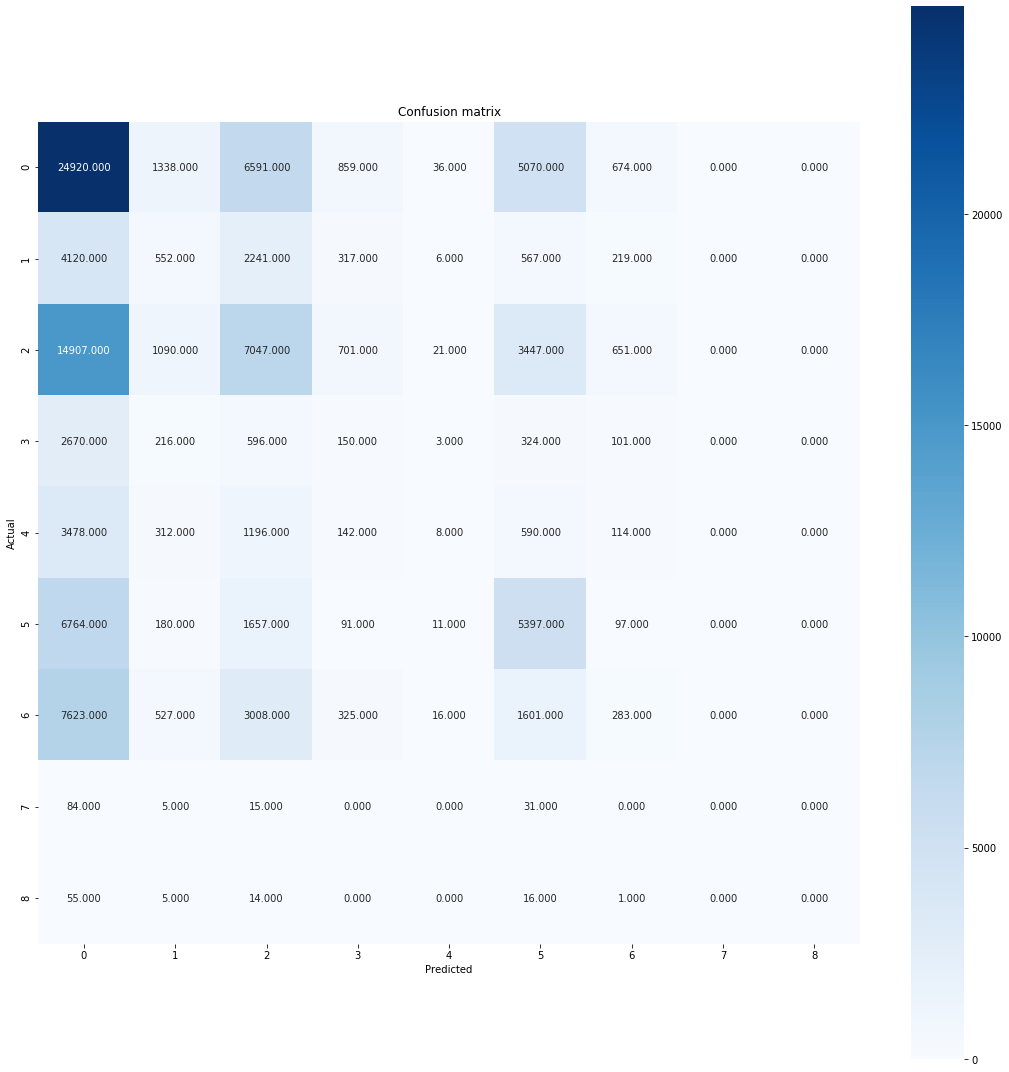

In [174]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.rcParams['figure.figsize'] = 15, 15
plt.tight_layout()

In [175]:
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.3392023346303502, 0.6607976653696498, array([0.38563315, 0.13065089, 0.31509054, 0.05802708, 0.07920792,
       0.3166696 , 0.13224299, 0.        , 0.        ]), array([0.6310778 , 0.06881077, 0.25290698, 0.03694581, 0.00136986,
       0.38015074, 0.02114623, 0.        , 0.        ]), array([0.47872902, 0.09014453, 0.28059488, 0.04514673, 0.00269315,
       0.34551857, 0.03646202, 0.        , 0.        ])]


/Users/vidhyasagarudayakumar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/vidhyasagarudayakumar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



In [179]:
finaldatasets['point'] = (finaldatasets['X Coordinate'],finaldatasets['Y Coordinate'])

ValueError: Length of values does not match length of index

In [ ]:
value_counts = finaldatasets['point'].value_counts()

In [ ]:
chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=15)

In [ ]:
for i in range(1000):
    folium.CircleMarker(location = [finaldatasets['X Coordinate'], finaldatasets['Y Coordinate']] , fill = True).add_to(chicago_map_crime)